In [1]:
import pandas as pd
import numpy as np

데이터 불러오기

In [2]:
with open('2016_filtered_review_part.txt', encoding='utf-8') as f:
    docs = [doc.strip().split('\t\t') for doc in f]
    docs = [(doc[1], int(doc[2])) for doc in docs if len(doc) == 3]
    # To read the second and third column info from each row
    texts, scores = zip(*docs)
    # 둘을 분리해서 별도의 list 변수로 저장

평점 정보를 이용해서 종속변수 레이블링 하기

In [3]:
filtered_texts = []
filtered_labels = []

for text, score in zip(texts, scores):
    if 4 < score < 8:
        continue
        
    # 평점 기준으로 문서에 label을 부여
    # 1 ~ 4 -> 부정, 0
    # 8 ~ 10 -> 긍정, 1
    filtered_texts.append(text)
    filtered_labels.append(1 if score >= 8 else 0)

In [4]:
# To split the data into training and test datasets
from sklearn.model_selection import train_test_split
train_texts, test_texts, train_labels, test_labels = train_test_split(filtered_texts, filtered_labels, test_size=0.1, random_state=42)

In [5]:
from sklearn.linear_model import LogisticRegression

In [6]:
lr_tf_l1 = LogisticRegression(C=0.1, penalty='l1', solver='saga', max_iter=10000) 

In [7]:
from sklearn.feature_extraction.text import CountVectorizer
tf_vectorizer = CountVectorizer() 
tf_train_features = tf_vectorizer.fit_transform(train_texts) 
tf_test_features = tf_vectorizer.transform(test_texts)

In [8]:
lr_tf_l1.fit(tf_train_features, train_labels) # 학습

LogisticRegression(C=0.1, max_iter=10000, penalty='l1', solver='saga')

In [9]:
pred_labels = lr_tf_l1.predict(tf_test_features) # 예측

In [10]:
from sklearn.metrics import confusion_matrix
confusion_matrix(test_labels, pred_labels)

array([[  23,  115],
       [   8, 1806]], dtype=int64)

In [11]:
from sklearn.metrics import classification_report
print(classification_report(test_labels, pred_labels))

              precision    recall  f1-score   support

           0       0.74      0.17      0.27       138
           1       0.94      1.00      0.97      1814

    accuracy                           0.94      1952
   macro avg       0.84      0.58      0.62      1952
weighted avg       0.93      0.94      0.92      1952



# ROC curve / AUC

In [12]:
pred_probs = lr_tf_l1.predict_proba(tf_test_features)

In [13]:
pred_probs 

array([[0.06778962, 0.93221038],
       [0.03088857, 0.96911143],
       [0.07415929, 0.92584071],
       ...,
       [0.13041476, 0.86958524],
       [0.02004227, 0.97995773],
       [0.07415929, 0.92584071]])

In [14]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

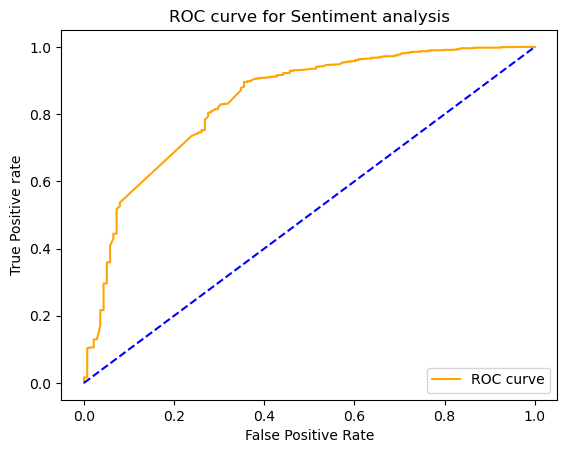

In [15]:
# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(test_labels, pred_probs[:,1], pos_label=1)

# 기준이 되는 tpr = fpr 선을 그리기 위한 부분
random_probs = [0 for i in range(len(test_labels))]
p_fpr, p_tpr, _ = roc_curve(test_labels, random_probs, pos_label=1)

# plot roc curves
plt.plot(fpr1, tpr1,color='orange', label='ROC curve')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')

plt.title('ROC curve for Sentiment analysis') # title
plt.xlabel('False Positive Rate') # x label
plt.ylabel('True Positive rate') # y label

plt.legend(loc="lower right")
plt.savefig('ROC',dpi=300)
plt.show()

In [16]:
np.set_printoptions(suppress=True)
print(thresh1) # 기준 확률값 확인하기

[1.99985748 0.99985748 0.99639877 0.99620468 0.9956802  0.99559546
 0.99551673 0.99422697 0.994213   0.99342609 0.99309679 0.99242474
 0.99232927 0.99199437 0.99196316 0.99100547 0.99087496 0.99046715
 0.99035003 0.98977261 0.98969045 0.98954229 0.98939212 0.98928728
 0.98912963 0.98881958 0.98878285 0.98877807 0.98801745 0.98778761
 0.98763531 0.98758011 0.9872098  0.98716669 0.98705086 0.98695896
 0.98636343 0.98633119 0.98581026 0.98565239 0.98556367 0.98555012
 0.9855432  0.98534162 0.98529189 0.98521573 0.98512673 0.98472909
 0.98465463 0.98426598 0.98423122 0.98412181 0.98316767 0.98306205
 0.98297749 0.98283106 0.98275946 0.98187457 0.98187062 0.98060048
 0.98006737 0.97995773 0.97983749 0.97983487 0.9797682  0.97975653
 0.97971256 0.97962822 0.97944395 0.97795121 0.97792019 0.9776302
 0.97761472 0.97629005 0.97617099 0.97614826 0.97597754 0.97593329
 0.97407632 0.97403354 0.97364624 0.97355789 0.97245895 0.97236536
 0.97217392 0.97209078 0.97190359 0.97167536 0.9716145  0.97159

In [17]:
from sklearn.metrics import roc_auc_score
auc_score = roc_auc_score(test_labels, pred_probs[:,1])
auc_score

0.837769442180784